In [1]:
!pip install git+https://github.com/hiive/mlrose.git

  Cloning https://github.com/hiive/mlrose.git to /tmp/pip-req-build-e3k11v3g
  Running command git clone --filter=blob:none --quiet https://github.com/hiive/mlrose.git /tmp/pip-req-build-e3k11v3g
  Resolved https://github.com/hiive/mlrose.git to commit c23243b0f4b9fed7c6dec021ae7ab336f2426d21
  Preparing metadata (setup.py) ... done
  Created wheel for mlrose-hiive: filename=mlrose_hiive-2.2.4-py3-none-any.whl size=103052 sha256=a3f4f7e08db3aa3fce5537053f5c995ec0030e347cf0b5a516cc05b4956a61e0
  Stored in directory: /tmp/pip-ephem-wheel-cache-5wdaj95l/wheels/5c/2e/f2/3eb8616108613013d0a4151f6896af89272d179e2d31f060ba
Successfully built mlrose-hiive


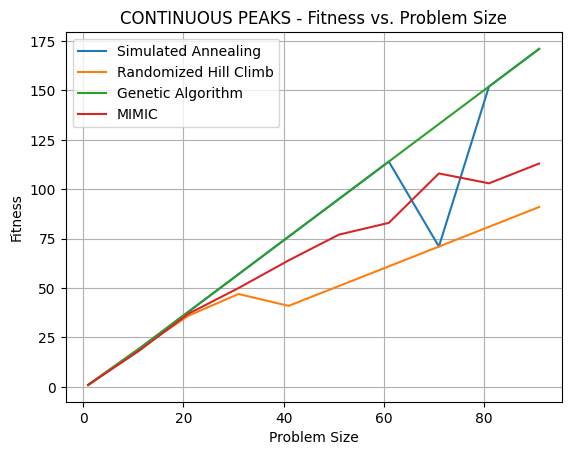

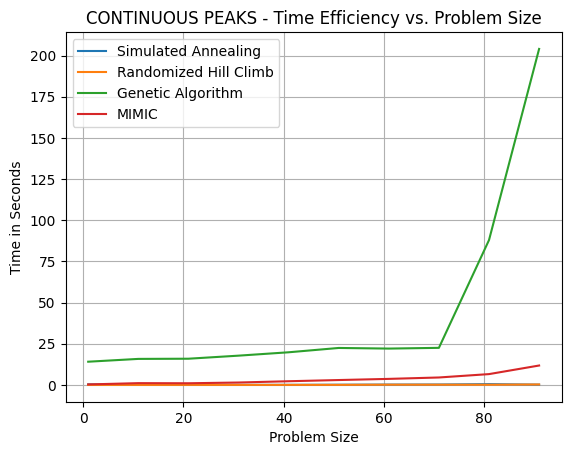

In [ ]:
import numpy as np
from random import randint
import mlrose_hiive
import matplotlib.pyplot as plt
import time

np.random.seed(24)
fitness_sa = fitness_rhc = fitness_ga = fitness_mimic = np.array([])
time_sa = time_rhc = time_ga = time_mimic = np.array([])
lengths = range(1,101,10)

for leng in lengths:
    fitness = mlrose_hiive.ContinuousPeaks(t_pct = 0.1)
    problem = mlrose_hiive.DiscreteOpt(length = leng, fitness_fn = fitness, maximize = True, max_val = 2)
    start = time.time()
    sa_schedule = mlrose_hiive.ExpDecay()
    sa_state, best_fitness_sa, fitness_curve_sa = mlrose_hiive.simulated_annealing(problem, schedule = sa_schedule, max_attempts = 1000, max_iters = 10000, curve = True)
    sa_time = time.time() - start
    fitness_sa = np.append(fitness_sa, best_fitness_sa)
    time_sa = np.append(time_sa, sa_time)
    start = time.time()
    rhc_state, best_fitness_rhc, fitness_curve_rhc = mlrose_hiive.random_hill_climb(problem, max_attempts = 1000, max_iters = 10000, curve = True)
    rhc_time = time.time() - start
    fitness_rhc = np.append(fitness_rhc, best_fitness_rhc)
    time_rhc = np.append(time_rhc, rhc_time)
    start = time.time()
    ga_state, best_fitness_ga, fitness_curve_ga = mlrose_hiive.genetic_alg(problem, max_attempts = 1000, max_iters = 10000, curve = True)
    ga_time = time.time() - start
    fitness_ga = np.append(fitness_ga, best_fitness_ga)
    time_ga = np.append(time_ga, ga_time)
    start = time.time()
    problem.set_mimic_fast_mode(True)
    mimic_state, best_fitness_mimic, fitness_curve_mimic = mlrose_hiive.mimic(problem, pop_size = 200, max_attempts = 100, max_iters = 10000, curve = True)
    mimic_time = time.time() - start
    fitness_mimic = np.append(fitness_mimic, best_fitness_mimic)
    time_mimic = np.append(time_mimic, mimic_time)

plt.figure()
plt.plot(lengths, fitness_sa, label = 'Simulated Annealing')
plt.plot(lengths, fitness_rhc, label = 'Randomized Hill Climb')
plt.plot(lengths, fitness_ga, label = 'Genetic Algorithm')
plt.plot(lengths, fitness_mimic, label = 'MIMIC')
plt.title('CONTINUOUS PEAKS - Fitness vs. Problem Size')
plt.xlabel('Problem Size')
plt.ylabel('Fitness')
plt.legend()
plt.grid(True)
plt.savefig('CP_Fitness.png')
plt.figure()
plt.plot(lengths, time_sa, label = 'Simulated Annealing')
plt.plot(lengths, time_rhc, label = 'Randomized Hill Climb')
plt.plot(lengths, time_ga, label = 'Genetic Algorithm')
plt.plot(lengths, time_mimic, label = 'MIMIC')
plt.title('CONTINUOUS PEAKS - Time Efficiency vs. Problem Size')
plt.legend()
plt.xlabel('Problem Size')
plt.ylabel('Time in Seconds')
plt.grid(True)
plt.savefig('CP_Time.png')

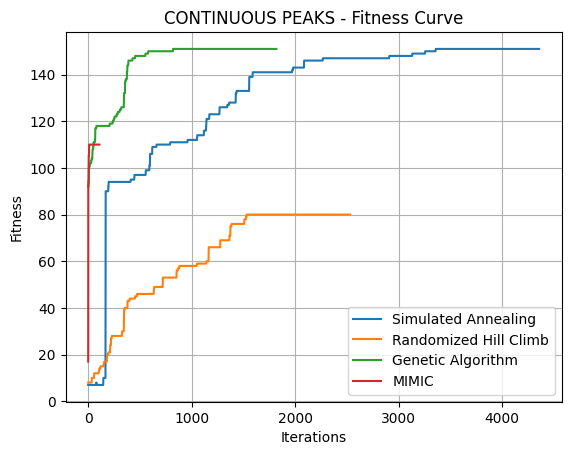

In [ ]:
from random import randint
import numpy as np
import mlrose_hiive
import matplotlib.pyplot as plt
import time

np.random.seed(24)
len_problem = 60
fitness = mlrose_hiive.ContinuousPeaks(t_pct = 0.1)
problem = mlrose_hiive.DiscreteOpt(length = len_problem, fitness_fn = fitness, maximize = True, max_val = 2)
problem.set_mimic_fast_mode(True)
sa_state, best_fitness_sa, fitness_curve_sa = mlrose_hiive.simulated_annealing(problem, schedule = mlrose_hiive.ExpDecay(), max_attempts = 1000, max_iters = 10000, curve = True)
rhc_state, best_fitness_rhc, fitness_curve_rhc = mlrose_hiive.random_hill_climb(problem, max_attempts = 1000, max_iters = 10000, curve = True)
ga_state, best_fitness_ga, fitness_curve_ga = mlrose_hiive.genetic_alg(problem, max_attempts = 1000, max_iters = 10000, curve = True)
mimic_state, best_fitness_mimic, fitness_curve_mimic = mlrose_hiive.mimic(problem, pop_size = 200, max_attempts = 100, max_iters = 10000, curve = True)
plt.figure()
plt.plot(fitness_curve_sa[:,0], label = 'Simulated Annealing')
plt.plot(fitness_curve_rhc[:,0], label = 'Randomized Hill Climb')
plt.plot(fitness_curve_ga[:,0], label = 'Genetic Algorithm')
plt.plot(fitness_curve_mimic[:,0], label = 'MIMIC')
plt.title('CONTINUOUS PEAKS - Fitness Curve')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.grid(True)
plt.savefig('CP_Iterations.png')

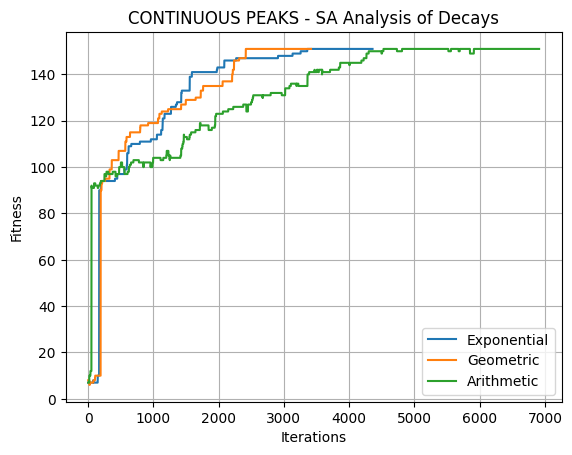

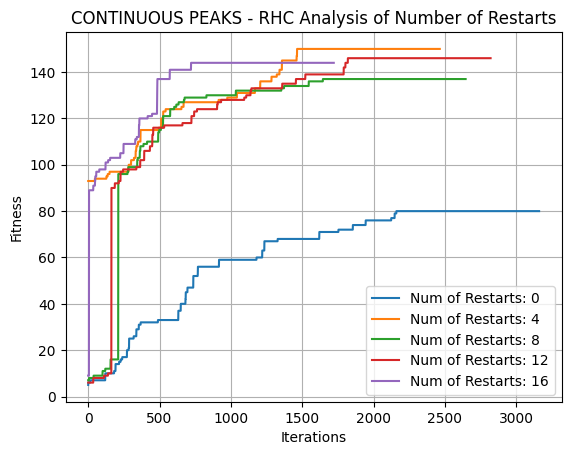

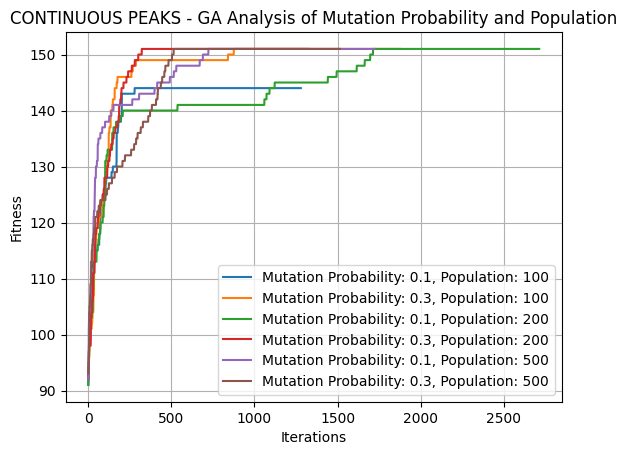

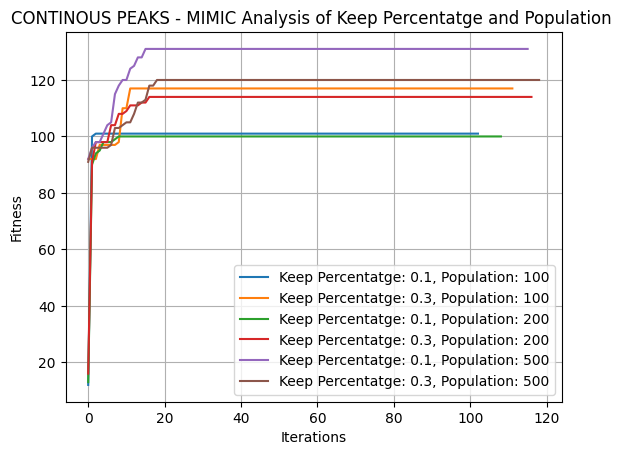

In [ ]:
import numpy as np
import mlrose_hiive
import matplotlib.pyplot as plt
import time
from random import randint
import warnings

np.random.seed(24)
len_problem = 60
fitness = mlrose_hiive.ContinuousPeaks(t_pct = 0.1)
problem = mlrose_hiive.DiscreteOpt(length = len_problem, fitness_fn = fitness, maximize = True, max_val = 2)

sa_state, best_fitness_sa, fitness_curve_sa_1 = mlrose_hiive.simulated_annealing(problem, schedule = mlrose_hiive.ExpDecay(), max_attempts = 1000, max_iters = 10000, curve = True)
sa_state, best_fitness_sa, fitness_curve_sa_2 = mlrose_hiive.simulated_annealing(problem, schedule = mlrose_hiive.GeomDecay(), max_attempts = 1000, max_iters = 10000, curve = True)
sa_state, best_fitness_sa, fitness_curve_sa_3 = mlrose_hiive.simulated_annealing(problem, schedule = mlrose_hiive.ArithDecay(), max_attempts = 1000, max_iters = 10000, curve = True)
plt.figure()
plt.plot(fitness_curve_sa_1[:,0], label = 'Exponential')
plt.plot(fitness_curve_sa_2[:,0], label = 'Geometric')
plt.plot(fitness_curve_sa_3[:,0], label = 'Arithmetic')
plt.title('CONTINUOUS PEAKS - SA Analysis of Decays')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.grid(True)
plt.savefig('CP_SA.png')

rhc_state, best_fitness_rhc, fitness_curve_rhc_1 = mlrose_hiive.random_hill_climb(problem, restarts = 0, max_attempts = 1000, max_iters = 10000, curve = True)
rhc_state, best_fitness_rhc, fitness_curve_rhc_2 = mlrose_hiive.random_hill_climb(problem, restarts = 4, max_attempts = 1000, max_iters = 10000, curve = True)
rhc_state, best_fitness_rhc, fitness_curve_rhc_3 = mlrose_hiive.random_hill_climb(problem, restarts = 8, max_attempts = 1000, max_iters = 10000, curve = True)
rhc_state, best_fitness_rhc, fitness_curve_rhc_4 = mlrose_hiive.random_hill_climb(problem, restarts = 12, max_attempts = 1000, max_iters = 10000, curve = True)
rhc_state, best_fitness_rhc, fitness_curve_rhc_5 = mlrose_hiive.random_hill_climb(problem, restarts = 16, max_attempts = 1000, max_iters = 10000, curve = True)
plt.figure()
plt.plot(fitness_curve_rhc_1[:,0], label = 'Num of Restarts: 0')
plt.plot(fitness_curve_rhc_2[:,0], label = 'Num of Restarts: 4')
plt.plot(fitness_curve_rhc_3[:,0], label = 'Num of Restarts: 8')
plt.plot(fitness_curve_rhc_4[:,0], label = 'Num of Restarts: 12')
plt.plot(fitness_curve_rhc_5[:,0], label = 'Num of Restarts: 16')
plt.title('CONTINUOUS PEAKS - RHC Analysis of Number of Restarts')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.grid(True)
plt.savefig('CP_RHC.png')

ga_state, best_fitness_ga, fitness_curve_ga_1 = mlrose_hiive.genetic_alg(problem, mutation_prob = 0.1, pop_size = 100, max_attempts = 1000, max_iters = 10000, curve = True)
ga_state, best_fitness_ga, fitness_curve_ga_2 = mlrose_hiive.genetic_alg(problem, mutation_prob = 0.3, pop_size = 100, max_attempts = 1000, max_iters = 10000, curve = True)
ga_state, best_fitness_ga, fitness_curve_ga_3 = mlrose_hiive.genetic_alg(problem, mutation_prob = 0.1, pop_size = 200, max_attempts = 1000, max_iters = 10000, curve = True)
ga_state, best_fitness_ga, fitness_curve_ga_4 = mlrose_hiive.genetic_alg(problem, mutation_prob = 0.3, pop_size = 200, max_attempts = 1000, max_iters = 10000, curve = True)
ga_state, best_fitness_ga, fitness_curve_ga_5 = mlrose_hiive.genetic_alg(problem, mutation_prob = 0.1, pop_size = 500, max_attempts = 1000, max_iters = 10000, curve = True)
ga_state, best_fitness_ga, fitness_curve_ga_6 = mlrose_hiive.genetic_alg(problem, mutation_prob = 0.3, pop_size = 500, max_attempts = 1000, max_iters = 10000, curve = True)
plt.figure()
plt.plot(fitness_curve_ga_1[:,0], label = 'Mutation Probability: 0.1, Population: 100')
plt.plot(fitness_curve_ga_2[:,0], label = 'Mutation Probability: 0.3, Population: 100')
plt.plot(fitness_curve_ga_3[:,0], label = 'Mutation Probability: 0.1, Population: 200')
plt.plot(fitness_curve_ga_4[:,0], label = 'Mutation Probability: 0.3, Population: 200')
plt.plot(fitness_curve_ga_5[:,0], label = 'Mutation Probability: 0.1, Population: 500')
plt.plot(fitness_curve_ga_6[:,0], label = 'Mutation Probability: 0.3, Population: 500')
plt.title('CONTINUOUS PEAKS - GA Analysis of Mutation Probability and Population')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.grid(True)
plt.savefig('CP_GA.png')

problem.set_mimic_fast_mode(True)
mimic_state, best_fitness_mimic, fitness_curve_mimic_1 = mlrose_hiive.mimic(problem, keep_pct = 0.1, pop_size = 100, max_attempts = 100, max_iters = 10000, curve = True)
mimic_state, best_fitness_mimic, fitness_curve_mimic_2 = mlrose_hiive.mimic(problem, keep_pct = 0.3, pop_size = 100, max_attempts = 100, max_iters = 10000, curve = True)
mimic_state, best_fitness_mimic, fitness_curve_mimic_3 = mlrose_hiive.mimic(problem, keep_pct = 0.1, pop_size = 200, max_attempts = 100, max_iters = 10000, curve = True)
mimic_state, best_fitness_mimic, fitness_curve_mimic_4 = mlrose_hiive.mimic(problem, keep_pct = 0.3, pop_size = 200, max_attempts = 100, max_iters = 10000, curve = True)
mimic_state, best_fitness_mimic, fitness_curve_mimic_5 = mlrose_hiive.mimic(problem, keep_pct = 0.1, pop_size = 500, max_attempts = 100, max_iters = 10000, curve = True)
mimic_state, best_fitness_mimic, fitness_curve_mimic_6 = mlrose_hiive.mimic(problem, keep_pct = 0.3, pop_size = 500, max_attempts = 100, max_iters = 10000, curve = True)
plt.figure()
plt.plot(fitness_curve_mimic_1[:,0], label = 'Keep Percentatge: 0.1, Population: 100')
plt.plot(fitness_curve_mimic_2[:,0], label = 'Keep Percentatge: 0.3, Population: 100')
plt.plot(fitness_curve_mimic_3[:,0], label = 'Keep Percentatge: 0.1, Population: 200')
plt.plot(fitness_curve_mimic_4[:,0], label = 'Keep Percentatge: 0.3, Population: 200')
plt.plot(fitness_curve_mimic_5[:,0], label = 'Keep Percentatge: 0.1, Population: 500')
plt.plot(fitness_curve_mimic_6[:,0], label = 'Keep Percentatge: 0.3, Population: 500')
plt.title('CONTINOUS PEAKS - MIMIC Analysis of Keep Percentatge and Population ')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.grid(True)
plt.savefig('CP_MIMIC.png')

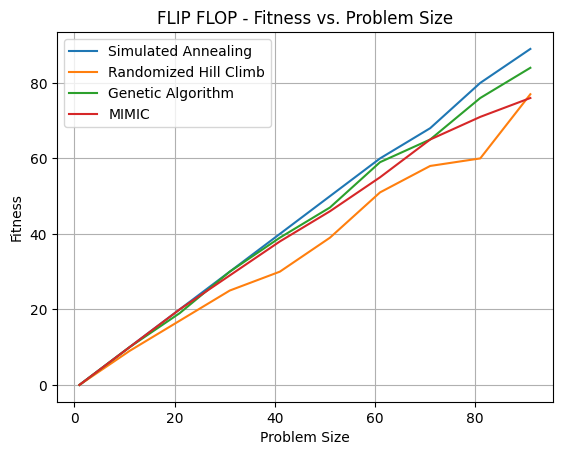

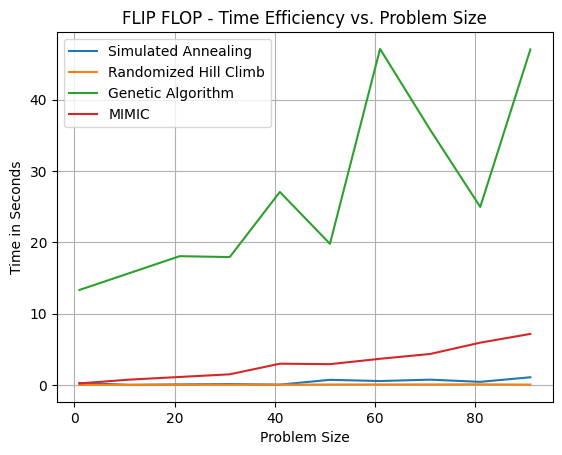

In [ ]:
import numpy as np
import mlrose_hiive
import matplotlib.pyplot as plt
import time

np.random.seed(24)
fitness_sa = fitness_rhc = fitness_ga = fitness_mimic = np.array([])
time_sa = time_rhc = time_ga = time_mimic = np.array([])
lengths = range(1,101,10)
for leng in lengths:
    fitness = mlrose_hiive.FlipFlop()
    problem = mlrose_hiive.DiscreteOpt(length = leng, fitness_fn = fitness, maximize = True, max_val = 2)
    start = time.time()
    sa_schedule = mlrose_hiive.ExpDecay()
    sa_state, best_fitness_sa, fitness_curve_sa = mlrose_hiive.simulated_annealing(problem, schedule = sa_schedule, max_attempts = 1000, max_iters = 10000, curve = True)
    sa_time = time.time() - start
    fitness_sa = np.append(fitness_sa, best_fitness_sa)
    time_sa = np.append(time_sa, sa_time)
    start = time.time()
    rhc_state, best_fitness_rhc, fitness_curve_rhc = mlrose_hiive.random_hill_climb(problem, max_attempts = 1000, max_iters = 10000, curve = True)
    rhc_time = time.time() - start
    fitness_rhc = np.append(fitness_rhc, best_fitness_rhc)
    time_rhc = np.append(time_rhc, rhc_time)
    start = time.time()
    ga_state, best_fitness_ga, fitness_curve_ga = mlrose_hiive.genetic_alg(problem, max_attempts = 1000, max_iters = 10000, curve = True)
    ga_time = time.time() - start
    fitness_ga = np.append(fitness_ga, best_fitness_ga)
    time_ga = np.append(time_ga, ga_time)
    start = time.time()
    problem.set_mimic_fast_mode(True)
    mimic_state, best_fitness_mimic, fitness_curve_mimic = mlrose_hiive.mimic(problem, pop_size = 200, max_attempts = 100, max_iters = 10000, curve = True)
    mimic_time = time.time() - start
    fitness_mimic = np.append(fitness_mimic, best_fitness_mimic)
    time_mimic = np.append(time_mimic, mimic_time)

plt.figure()
plt.plot(lengths, fitness_sa, label = 'Simulated Annealing')
plt.plot(lengths, fitness_rhc, label = 'Randomized Hill Climb')
plt.plot(lengths, fitness_ga, label = 'Genetic Algorithm')
plt.plot(lengths, fitness_mimic, label = 'MIMIC')
plt.title('FLIP FLOP - Fitness vs. Problem Size')
plt.xlabel('Problem Size')
plt.ylabel('Fitness')
plt.legend()
plt.grid(True)
plt.savefig('FF_Fitness.png')
plt.figure()
plt.plot(lengths, time_sa, label = 'Simulated Annealing')
plt.plot(lengths, time_rhc, label = 'Randomized Hill Climb')
plt.plot(lengths, time_ga, label = 'Genetic Algorithm')
plt.plot(lengths, time_mimic, label = 'MIMIC')
plt.title('FLIP FLOP - Time Efficiency vs. Problem Size')
plt.legend()
plt.xlabel('Problem Size')
plt.ylabel('Time in Seconds')
plt.grid(True)
plt.savefig('FF_Time.png')

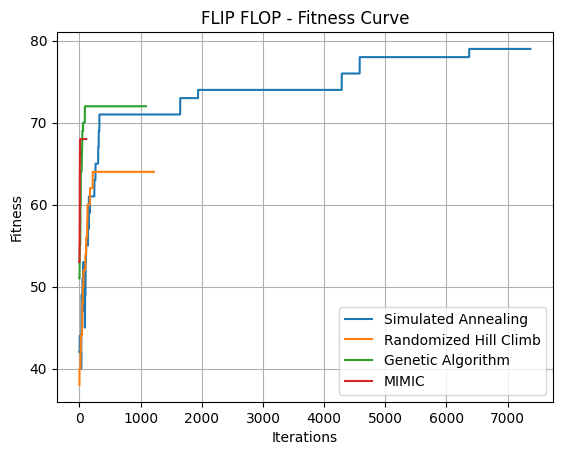

In [ ]:
import numpy as np
import mlrose_hiive
import matplotlib.pyplot as plt
import time

np.random.seed(24)
len_problem = 80
fitness = mlrose_hiive.FlipFlop()
problem = mlrose_hiive.DiscreteOpt(length = len_problem, fitness_fn = fitness, maximize = True, max_val = 2)
problem.set_mimic_fast_mode(True)
sa_state, best_fitness_sa, fitness_curve_sa = mlrose_hiive.simulated_annealing(problem, schedule = mlrose_hiive.ExpDecay(), max_attempts = 1000, max_iters = 10000, curve = True)
rhc_state, best_fitness_rhc, fitness_curve_rhc = mlrose_hiive.random_hill_climb(problem, max_attempts = 1000, max_iters = 10000, curve = True)
ga_state, best_fitness_ga, fitness_curve_ga = mlrose_hiive.genetic_alg(problem, max_attempts = 1000, max_iters = 10000, curve = True)
mimic_state, best_fitness_mimic, fitness_curve_mimic = mlrose_hiive.mimic(problem, pop_size = 200, max_attempts = 100, max_iters = 10000, curve = True)
plt.figure()
plt.plot(fitness_curve_sa[:,0], label = 'Simulated Annealing')
plt.plot(fitness_curve_rhc[:,0], label = 'Randomized Hill Climb')
plt.plot(fitness_curve_ga[:,0], label = 'Genetic Algorithm')
plt.plot(fitness_curve_mimic[:,0], label = 'MIMIC')
plt.title('FLIP FLOP - Fitness Curve')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.grid(True)
plt.savefig('FF_Iterations.png')

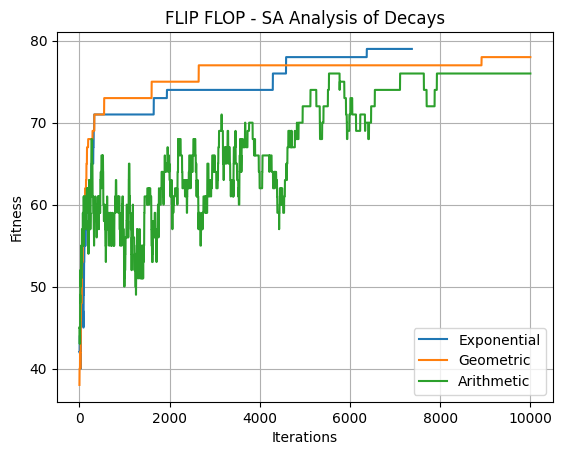

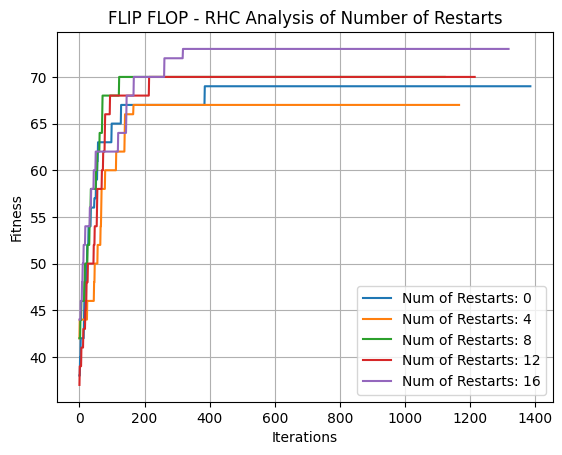

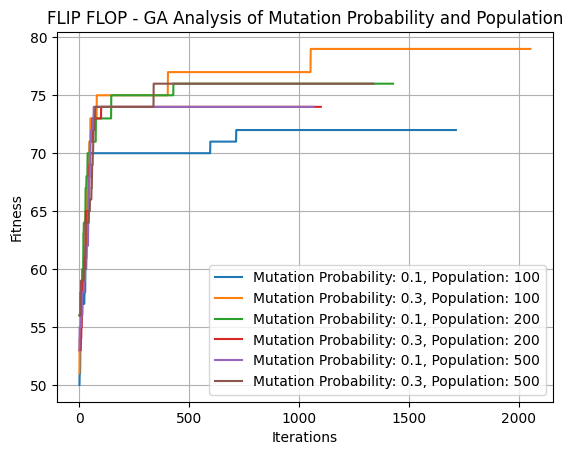

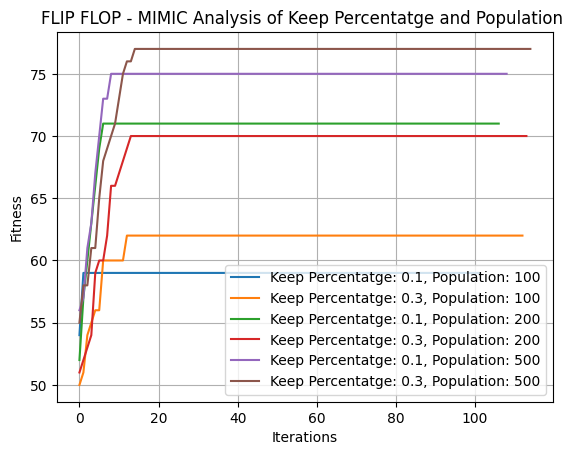

In [ ]:
import numpy as np
import mlrose_hiive
import matplotlib.pyplot as plt
import time

np.random.seed(24)
len_problem = 80
fitness = mlrose_hiive.FlipFlop()
problem = mlrose_hiive.DiscreteOpt(length = len_problem, fitness_fn = fitness, maximize = True, max_val = 2)
sa_state, best_fitness_sa, fitness_curve_sa_1 = mlrose_hiive.simulated_annealing(problem, schedule = mlrose_hiive.ExpDecay(), max_attempts = 1000, max_iters = 10000, curve = True)
sa_state, best_fitness_sa, fitness_curve_sa_2 = mlrose_hiive.simulated_annealing(problem, schedule = mlrose_hiive.GeomDecay(), max_attempts = 1000, max_iters = 10000, curve = True)
sa_state, best_fitness_sa, fitness_curve_sa_3 = mlrose_hiive.simulated_annealing(problem, schedule = mlrose_hiive.ArithDecay(), max_attempts = 1000, max_iters = 10000, curve = True)
plt.figure()
plt.plot(fitness_curve_sa_1[:,0], label = 'Exponential')
plt.plot(fitness_curve_sa_2[:,0], label = 'Geometric')
plt.plot(fitness_curve_sa_3[:,0], label = 'Arithmetic')
plt.title('FLIP FLOP - SA Analysis of Decays')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.grid(True)
plt.savefig('FF_SA.png')

rhc_state, best_fitness_rhc, fitness_curve_rhc_1 = mlrose_hiive.random_hill_climb(problem, restarts = 0, max_attempts = 1000, max_iters = 10000, curve = True)
rhc_state, best_fitness_rhc, fitness_curve_rhc_2 = mlrose_hiive.random_hill_climb(problem, restarts = 4, max_attempts = 1000, max_iters = 10000, curve = True)
rhc_state, best_fitness_rhc, fitness_curve_rhc_3 = mlrose_hiive.random_hill_climb(problem, restarts = 8, max_attempts = 1000, max_iters = 10000, curve = True)
rhc_state, best_fitness_rhc, fitness_curve_rhc_4 = mlrose_hiive.random_hill_climb(problem, restarts = 12, max_attempts = 1000, max_iters = 10000, curve = True)
rhc_state, best_fitness_rhc, fitness_curve_rhc_5 = mlrose_hiive.random_hill_climb(problem, restarts = 16, max_attempts = 1000, max_iters = 10000, curve = True)
plt.figure()
plt.plot(fitness_curve_rhc_1[:,0], label = 'Num of Restarts: 0')
plt.plot(fitness_curve_rhc_2[:,0], label = 'Num of Restarts: 4')
plt.plot(fitness_curve_rhc_3[:,0], label = 'Num of Restarts: 8')
plt.plot(fitness_curve_rhc_4[:,0], label = 'Num of Restarts: 12')
plt.plot(fitness_curve_rhc_5[:,0], label = 'Num of Restarts: 16')
plt.title('FLIP FLOP - RHC Analysis of Number of Restarts')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.grid(True)
plt.savefig('FF_RHC.png')

ga_state, best_fitness_ga, fitness_curve_ga_1 = mlrose_hiive.genetic_alg(problem, mutation_prob = 0.1, pop_size = 100, max_attempts = 1000, max_iters = 10000, curve = True)
ga_state, best_fitness_ga, fitness_curve_ga_2 = mlrose_hiive.genetic_alg(problem, mutation_prob = 0.3, pop_size = 100, max_attempts = 1000, max_iters = 10000, curve = True)
ga_state, best_fitness_ga, fitness_curve_ga_3 = mlrose_hiive.genetic_alg(problem, mutation_prob = 0.1, pop_size = 200, max_attempts = 1000, max_iters = 10000, curve = True)
ga_state, best_fitness_ga, fitness_curve_ga_4 = mlrose_hiive.genetic_alg(problem, mutation_prob = 0.3, pop_size = 200, max_attempts = 1000, max_iters = 10000, curve = True)
ga_state, best_fitness_ga, fitness_curve_ga_5 = mlrose_hiive.genetic_alg(problem, mutation_prob = 0.1, pop_size = 500, max_attempts = 1000, max_iters = 10000, curve = True)
ga_state, best_fitness_ga, fitness_curve_ga_6 = mlrose_hiive.genetic_alg(problem, mutation_prob = 0.3, pop_size = 500, max_attempts = 1000, max_iters = 10000, curve = True)
plt.figure()
plt.plot(fitness_curve_ga_1[:,0], label = 'Mutation Probability: 0.1, Population: 100')
plt.plot(fitness_curve_ga_2[:,0], label = 'Mutation Probability: 0.3, Population: 100')
plt.plot(fitness_curve_ga_3[:,0], label = 'Mutation Probability: 0.1, Population: 200')
plt.plot(fitness_curve_ga_4[:,0], label = 'Mutation Probability: 0.3, Population: 200')
plt.plot(fitness_curve_ga_5[:,0], label = 'Mutation Probability: 0.1, Population: 500')
plt.plot(fitness_curve_ga_6[:,0], label = 'Mutation Probability: 0.3, Population: 500')
plt.title('FLIP FLOP - GA Analysis of Mutation Probability and Population')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.grid(True)
plt.savefig('FF_GA.png')

problem.set_mimic_fast_mode(True)
mimic_state, best_fitness_mimic, fitness_curve_mimic_1 = mlrose_hiive.mimic(problem, keep_pct = 0.1, pop_size = 100, max_attempts = 100, max_iters = 10000, curve = True)
mimic_state, best_fitness_mimic, fitness_curve_mimic_2 = mlrose_hiive.mimic(problem, keep_pct = 0.3, pop_size = 100, max_attempts = 100, max_iters = 10000, curve = True)
mimic_state, best_fitness_mimic, fitness_curve_mimic_3 = mlrose_hiive.mimic(problem, keep_pct = 0.1, pop_size = 200, max_attempts = 100, max_iters = 10000, curve = True)
mimic_state, best_fitness_mimic, fitness_curve_mimic_4 = mlrose_hiive.mimic(problem, keep_pct = 0.3, pop_size = 200, max_attempts = 100, max_iters = 10000, curve = True)
mimic_state, best_fitness_mimic, fitness_curve_mimic_5 = mlrose_hiive.mimic(problem, keep_pct = 0.1, pop_size = 500, max_attempts = 100, max_iters = 10000, curve = True)
mimic_state, best_fitness_mimic, fitness_curve_mimic_6 = mlrose_hiive.mimic(problem, keep_pct = 0.3, pop_size = 500, max_attempts = 100, max_iters = 10000, curve = True)
plt.figure()
plt.plot(fitness_curve_mimic_1[:,0], label = 'Keep Percentatge: 0.1, Population: 100')
plt.plot(fitness_curve_mimic_2[:,0], label = 'Keep Percentatge: 0.3, Population: 100')
plt.plot(fitness_curve_mimic_3[:,0], label = 'Keep Percentatge: 0.1, Population: 200')
plt.plot(fitness_curve_mimic_4[:,0], label = 'Keep Percentatge: 0.3, Population: 200')
plt.plot(fitness_curve_mimic_5[:,0], label = 'Keep Percentatge: 0.1, Population: 500')
plt.plot(fitness_curve_mimic_6[:,0], label = 'Keep Percentatge: 0.3, Population: 500')
plt.title('FLIP FLOP - MIMIC Analysis of Keep Percentatge and Population ')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.grid(True)
plt.savefig('FF_MIMIC.png')

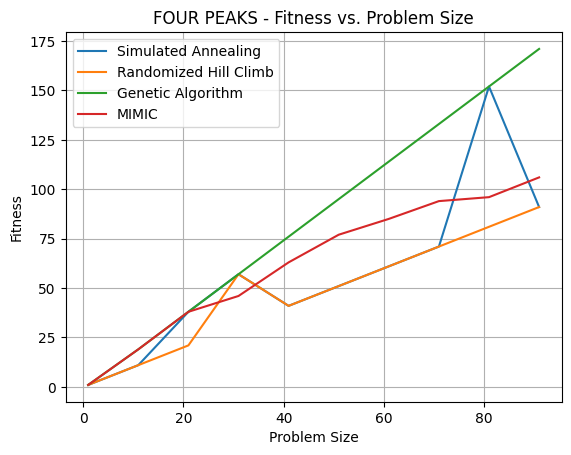

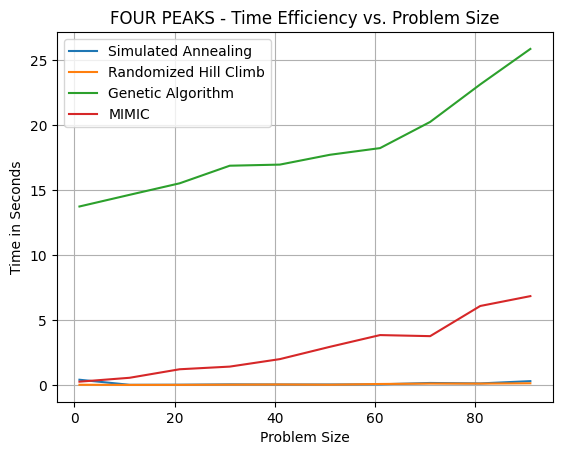

In [ ]:
import numpy as np
import mlrose_hiive
import matplotlib.pyplot as plt
import time

np.random.seed(24)
fitness_sa = fitness_rhc = fitness_ga = fitness_mimic = np.array([])
time_sa = time_rhc = time_ga = time_mimic = np.array([])
lengths = range(1,101,10)
for leng in lengths:
    fitness = mlrose_hiive.FourPeaks(t_pct = 0.1)
    problem = mlrose_hiive.DiscreteOpt(length = leng, fitness_fn = fitness, maximize = True, max_val = 2)
    start = time.time()
    sa_schedule = mlrose_hiive.ExpDecay()
    sa_state, best_fitness_sa, fitness_curve_sa = mlrose_hiive.simulated_annealing(problem, schedule = sa_schedule, max_attempts = 1000, max_iters = 10000, curve = True)
    sa_time = time.time() - start
    fitness_sa = np.append(fitness_sa, best_fitness_sa)
    time_sa = np.append(time_sa, sa_time)
    start = time.time()
    rhc_state, best_fitness_rhc, fitness_curve_rhc = mlrose_hiive.random_hill_climb(problem, max_attempts = 1000, max_iters = 10000, curve = True)
    rhc_time = time.time() - start
    fitness_rhc = np.append(fitness_rhc, best_fitness_rhc)
    time_rhc = np.append(time_rhc, rhc_time)
    start = time.time()
    ga_state, best_fitness_ga, fitness_curve_ga = mlrose_hiive.genetic_alg(problem, max_attempts = 1000, max_iters = 10000, curve = True)
    ga_time = time.time() - start
    fitness_ga = np.append(fitness_ga, best_fitness_ga)
    time_ga = np.append(time_ga, ga_time)
    start = time.time()
    problem.set_mimic_fast_mode(True)
    mimic_state, best_fitness_mimic, fitness_curve_mimic = mlrose_hiive.mimic(problem, pop_size = 200, max_attempts = 100, max_iters = 10000, curve = True)
    mimic_time = time.time() - start
    fitness_mimic = np.append(fitness_mimic, best_fitness_mimic)
    time_mimic = np.append(time_mimic, mimic_time)

plt.figure()
plt.plot(lengths, fitness_sa, label = 'Simulated Annealing')
plt.plot(lengths, fitness_rhc, label = 'Randomized Hill Climb')
plt.plot(lengths, fitness_ga, label = 'Genetic Algorithm')
plt.plot(lengths, fitness_mimic, label = 'MIMIC')
plt.title('FOUR PEAKS - Fitness vs. Problem Size')
plt.xlabel('Problem Size')
plt.ylabel('Fitness')
plt.legend()
plt.grid(True)
plt.savefig('FP_Fitness.png')
plt.figure()
plt.plot(lengths, time_sa, label = 'Simulated Annealing')
plt.plot(lengths, time_rhc, label = 'Randomized Hill Climb')
plt.plot(lengths, time_ga, label = 'Genetic Algorithm')
plt.plot(lengths, time_mimic, label = 'MIMIC')
plt.title('FOUR PEAKS - Time Efficiency vs. Problem Size')
plt.legend()
plt.xlabel('Problem Size')
plt.ylabel('Time in Seconds')
plt.grid(True)
plt.savefig('FP_Time.png')

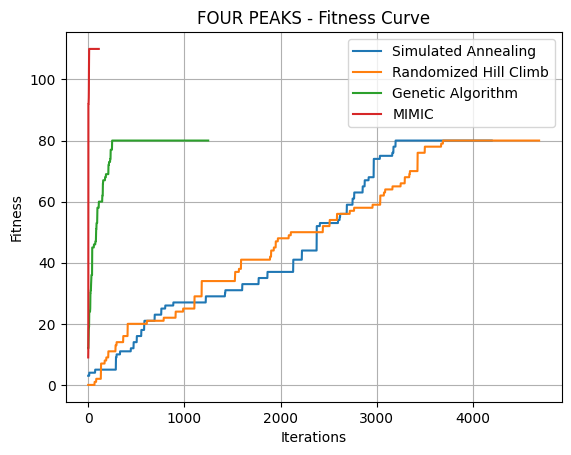

In [ ]:
import numpy as np
import mlrose_hiive
import matplotlib.pyplot as plt
import time

np.random.seed(24)
len_problem = 80
fitness = mlrose_hiive.FourPeaks(t_pct = 0.1)
problem = mlrose_hiive.DiscreteOpt(length = len_problem, fitness_fn = fitness, maximize = True, max_val = 2)
problem.set_mimic_fast_mode(True)
sa_state, best_fitness_sa, fitness_curve_sa = mlrose_hiive.simulated_annealing(problem, schedule = mlrose_hiive.ExpDecay(), max_attempts = 1000, max_iters = 10000, curve = True)
rhc_state, best_fitness_rhc, fitness_curve_rhc = mlrose_hiive.random_hill_climb(problem, max_attempts = 1000, max_iters = 10000, curve = True)
ga_state, best_fitness_ga, fitness_curve_ga = mlrose_hiive.genetic_alg(problem, max_attempts = 1000, max_iters = 10000, curve = True)
mimic_state, best_fitness_mimic, fitness_curve_mimic = mlrose_hiive.mimic(problem, pop_size = 200, max_attempts = 100, max_iters = 10000, curve = True)
plt.figure()
plt.plot(fitness_curve_sa[:,0], label = 'Simulated Annealing')
plt.plot(fitness_curve_rhc[:,0], label = 'Randomized Hill Climb')
plt.plot(fitness_curve_ga[:,0], label = 'Genetic Algorithm')
plt.plot(fitness_curve_mimic[:,0], label = 'MIMIC')
plt.title('FOUR PEAKS - Fitness Curve')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.grid(True)
plt.savefig('FP_Iterations.png')

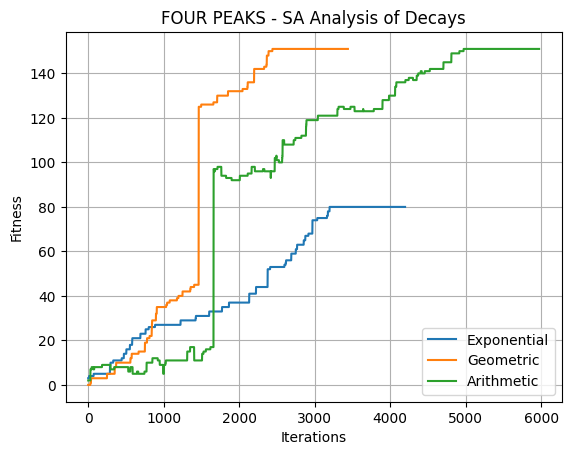

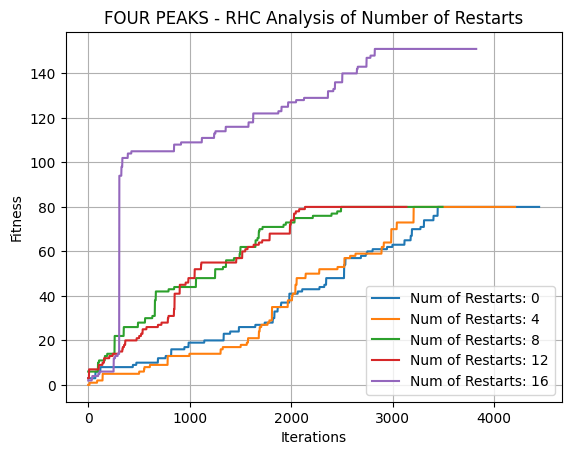

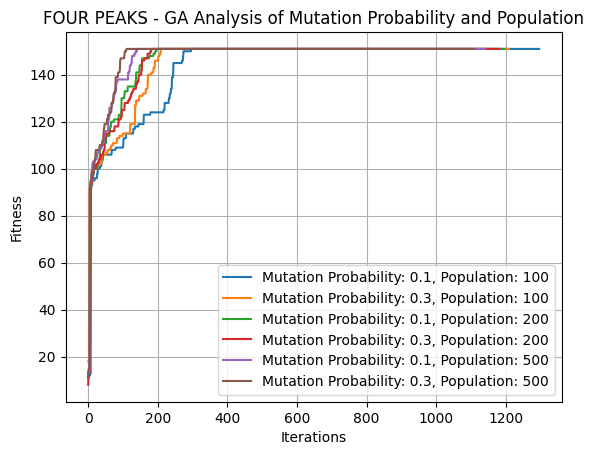

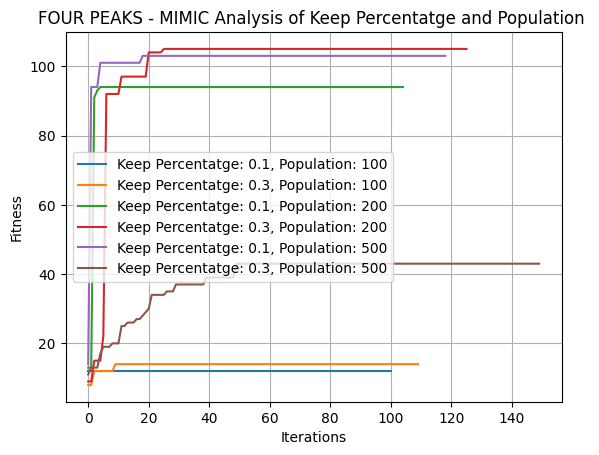

In [ ]:
import numpy as np
import mlrose_hiive
import matplotlib.pyplot as plt
import time

np.random.seed(24)
len_problem = 80
fitness = mlrose_hiive.FourPeaks(t_pct = 0.1)
problem = mlrose_hiive.DiscreteOpt(length = len_problem, fitness_fn = fitness, maximize = True, max_val = 2)
sa_state, best_fitness_sa, fitness_curve_sa_1 = mlrose_hiive.simulated_annealing(problem, schedule = mlrose_hiive.ExpDecay(), max_attempts = 1000, max_iters = 10000, curve = True)
sa_state, best_fitness_sa, fitness_curve_sa_2 = mlrose_hiive.simulated_annealing(problem, schedule = mlrose_hiive.GeomDecay(), max_attempts = 1000, max_iters = 10000, curve = True)
sa_state, best_fitness_sa, fitness_curve_sa_3 = mlrose_hiive.simulated_annealing(problem, schedule = mlrose_hiive.ArithDecay(), max_attempts = 1000, max_iters = 10000, curve = True)
plt.figure()
plt.plot(fitness_curve_sa_1[:,0], label = 'Exponential')
plt.plot(fitness_curve_sa_2[:,0], label = 'Geometric')
plt.plot(fitness_curve_sa_3[:,0], label = 'Arithmetic')
plt.title('FOUR PEAKS - SA Analysis of Decays')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.grid(True)
plt.savefig('FP_SA.png')

rhc_state, best_fitness_rhc, fitness_curve_rhc_1 = mlrose_hiive.random_hill_climb(problem, restarts = 0, max_attempts = 1000, max_iters = 10000, curve = True)
rhc_state, best_fitness_rhc, fitness_curve_rhc_2 = mlrose_hiive.random_hill_climb(problem, restarts = 4, max_attempts = 1000, max_iters = 10000, curve = True)
rhc_state, best_fitness_rhc, fitness_curve_rhc_3 = mlrose_hiive.random_hill_climb(problem, restarts = 8, max_attempts = 1000, max_iters = 10000, curve = True)
rhc_state, best_fitness_rhc, fitness_curve_rhc_4 = mlrose_hiive.random_hill_climb(problem, restarts = 12, max_attempts = 1000, max_iters = 10000, curve = True)
rhc_state, best_fitness_rhc, fitness_curve_rhc_5 = mlrose_hiive.random_hill_climb(problem, restarts = 16, max_attempts = 1000, max_iters = 10000, curve = True)
plt.figure()
plt.plot(fitness_curve_rhc_1[:,0], label = 'Num of Restarts: 0')
plt.plot(fitness_curve_rhc_2[:,0], label = 'Num of Restarts: 4')
plt.plot(fitness_curve_rhc_3[:,0], label = 'Num of Restarts: 8')
plt.plot(fitness_curve_rhc_4[:,0], label = 'Num of Restarts: 12')
plt.plot(fitness_curve_rhc_5[:,0], label = 'Num of Restarts: 16')
plt.title('FOUR PEAKS - RHC Analysis of Number of Restarts')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.grid(True)
plt.savefig('FP_RHC.png')

ga_state, best_fitness_ga, fitness_curve_ga_1 = mlrose_hiive.genetic_alg(problem, mutation_prob = 0.1, pop_size = 100, max_attempts = 1000, max_iters = 10000, curve = True)
ga_state, best_fitness_ga, fitness_curve_ga_2 = mlrose_hiive.genetic_alg(problem, mutation_prob = 0.3, pop_size = 100, max_attempts = 1000, max_iters = 10000, curve = True)
ga_state, best_fitness_ga, fitness_curve_ga_3 = mlrose_hiive.genetic_alg(problem, mutation_prob = 0.1, pop_size = 200, max_attempts = 1000, max_iters = 10000, curve = True)
ga_state, best_fitness_ga, fitness_curve_ga_4 = mlrose_hiive.genetic_alg(problem, mutation_prob = 0.3, pop_size = 200, max_attempts = 1000, max_iters = 10000, curve = True)
ga_state, best_fitness_ga, fitness_curve_ga_5 = mlrose_hiive.genetic_alg(problem, mutation_prob = 0.1, pop_size = 500, max_attempts = 1000, max_iters = 10000, curve = True)
ga_state, best_fitness_ga, fitness_curve_ga_6 = mlrose_hiive.genetic_alg(problem, mutation_prob = 0.3, pop_size = 500, max_attempts = 1000, max_iters = 10000, curve = True)
plt.figure()
plt.plot(fitness_curve_ga_1[:,0], label = 'Mutation Probability: 0.1, Population: 100')
plt.plot(fitness_curve_ga_2[:,0], label = 'Mutation Probability: 0.3, Population: 100')
plt.plot(fitness_curve_ga_3[:,0], label = 'Mutation Probability: 0.1, Population: 200')
plt.plot(fitness_curve_ga_4[:,0], label = 'Mutation Probability: 0.3, Population: 200')
plt.plot(fitness_curve_ga_5[:,0], label = 'Mutation Probability: 0.1, Population: 500')
plt.plot(fitness_curve_ga_6[:,0], label = 'Mutation Probability: 0.3, Population: 500')
plt.title('FOUR PEAKS - GA Analysis of Mutation Probability and Population')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.grid(True)
plt.savefig('FP_GA.png')

problem.set_mimic_fast_mode(True)
mimic_state, best_fitness_mimic, fitness_curve_mimic_1 = mlrose_hiive.mimic(problem, keep_pct = 0.1, pop_size = 100, max_attempts = 100, max_iters = 10000, curve = True)
mimic_state, best_fitness_mimic, fitness_curve_mimic_2 = mlrose_hiive.mimic(problem, keep_pct = 0.3, pop_size = 100, max_attempts = 100, max_iters = 10000, curve = True)
mimic_state, best_fitness_mimic, fitness_curve_mimic_3 = mlrose_hiive.mimic(problem, keep_pct = 0.1, pop_size = 200, max_attempts = 100, max_iters = 10000, curve = True)
mimic_state, best_fitness_mimic, fitness_curve_mimic_4 = mlrose_hiive.mimic(problem, keep_pct = 0.3, pop_size = 200, max_attempts = 100, max_iters = 10000, curve = True)
mimic_state, best_fitness_mimic, fitness_curve_mimic_5 = mlrose_hiive.mimic(problem, keep_pct = 0.1, pop_size = 500, max_attempts = 100, max_iters = 10000, curve = True)
mimic_state, best_fitness_mimic, fitness_curve_mimic_6 = mlrose_hiive.mimic(problem, keep_pct = 0.3, pop_size = 500, max_attempts = 100, max_iters = 10000, curve = True)
plt.figure()
plt.plot(fitness_curve_mimic_1[:,0], label = 'Keep Percentatge: 0.1, Population: 100')
plt.plot(fitness_curve_mimic_2[:,0], label = 'Keep Percentatge: 0.3, Population: 100')
plt.plot(fitness_curve_mimic_3[:,0], label = 'Keep Percentatge: 0.1, Population: 200')
plt.plot(fitness_curve_mimic_4[:,0], label = 'Keep Percentatge: 0.3, Population: 200')
plt.plot(fitness_curve_mimic_5[:,0], label = 'Keep Percentatge: 0.1, Population: 500')
plt.plot(fitness_curve_mimic_6[:,0], label = 'Keep Percentatge: 0.3, Population: 500')
plt.title('FOUR PEAKS - MIMIC Analysis of Keep Percentatge and Population ')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.grid(True)
plt.savefig('FP_MIMIC.png')

In [2]:
import numpy as np
import mlrose_hiive
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing, datasets
import pandas as pd
import time

# Load Breast Cancer Dataset
file_path_cancer = 'drive/MyDrive/wdbc.data'
df_cancer = pd.read_csv(file_path_cancer, header=None)

# Drop the ID column for Breast Cancer Dataset
df_cancer = df_cancer.drop(columns=df_cancer.columns[0])

# Separate features (X) and labels (y)
X = df_cancer.iloc[:, 1:]
y = df_cancer.iloc[:, 0]

# Map labels to numerical lengs (0 for 'B', 1 for 'M')
y = (y == 'M').astype(int)

# Standardize features using preprocessing.scale
X = preprocessing.scale(X)

# Split the dataset into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=24)


# Parameter lists
learning_rates = [0.00001, 0.0001, 0.01, 0.1, 1]
restarts = [2, 4, 6, 8, 10]
schedules = [mlrose_hiive.GeomDecay(), mlrose_hiive.ExpDecay(), mlrose_hiive.ArithDecay()]
populations = [20, 50, 100, 200, 500]

# Function to initialize arrays
def initialize_arrays(num_lr, num_param, num_param_lengs):
    acuracy_train = np.zeros((num_lr, num_param_lengs))
    acuracy_val = np.zeros((num_lr, num_param_lengs))
    acuracy_validation_best = 0.0
    best_lr_index = 0
    best_index_opt = 0
    acuracy_test = np.zeros((num_lr, num_param_lengs))
    acuracy_time = np.zeros((num_lr, num_param_lengs))
    return acuracy_train, acuracy_val, acuracy_validation_best, best_lr_index, best_index_opt, acuracy_test, acuracy_time

# Initialize arrays for RHC
train_acuracy_rhc, validation_acuracy_rhc, validation_acuracy_rhc_best, rhc_best_lr_index, rhc_best_index_opt, test_acuracy_rhc, time_rhc = initialize_arrays(len(learning_rates), len(restarts), len(restarts))

# Initialize arrays for SA
train_acuracy_sa, validation_acuracy_sa, validation_acuracy_sa_best, sa_best_lr_index, sa_best_index_opt, test_acuracy_sa, time_sa = initialize_arrays(len(learning_rates), len(schedules), len(schedules))

# Initialize arrays for GA
train_acuracy_ga, validation_acuracy_ga, validation_acuracy_ga_best, ga_best_lr_index, ga_best_index_opt, test_acuracy_ga, time_ga = initialize_arrays(len(learning_rates), len(populations), len(populations))

# Initialize arrays for Backpropagation
train_acuracy_backprop, validation_acuracy_backprop, validation_acuracy_backprop_best, backprop_best_lr_index, backprop_best_index_opt, test_acuracy_backprop, time_backpropagation= initialize_arrays(len(learning_rates), 1, 1)


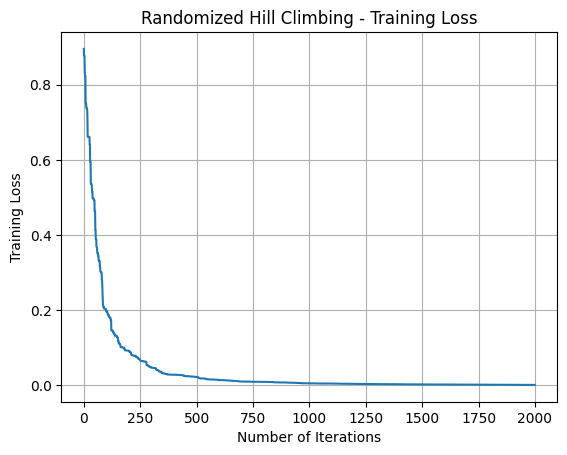

In [3]:
import numpy as np
import mlrose_hiive
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing, datasets
import pandas as pd
import time

nnbest = mlrose_hiive.NeuralNetwork(hidden_nodes = [12], activation ='relu', algorithm ='random_hill_climb', max_iters = 2000, bias = True, is_classifier = True, learning_rate = 0.00001, early_stopping = True, max_attempts = 100, random_state = 24, curve = True)
for lr_index, learning_rate in enumerate(learning_rates):
	for index_opt, restart in enumerate(restarts):
		nn_rhc = mlrose_hiive.NeuralNetwork(hidden_nodes = [12], activation ='relu', algorithm ='random_hill_climb', max_iters = 2000, bias = True, restarts = restart, is_classifier = True, learning_rate = learning_rate, early_stopping = True, max_attempts = 100, random_state = 24, curve = True)
		start = time.time()
		nn_rhc.fit(X_train, y_train)
		time_rhc_current = time.time() - start
		y_train_pred_rhc = nn_rhc.predict(X_train)
		y_train_accuracy_rhc = accuracy_score(y_train, y_train_pred_rhc)
		train_acuracy_rhc[lr_index][index_opt] = y_train_accuracy_rhc
		y_validation_pred_rhc = nn_rhc.predict(X_val)
		y_validation_accuracy_rhc = accuracy_score(y_val, y_validation_pred_rhc)
		validation_acuracy_rhc[lr_index][index_opt]= y_validation_accuracy_rhc
		y_test_pred_rhc = nn_rhc.predict(X_test)
		y_test_accuracy_rhc = accuracy_score(y_test, y_test_pred_rhc)
		test_acuracy_rhc[lr_index][index_opt] = y_test_accuracy_rhc
		time_rhc[lr_index][index_opt]= time_rhc_current
		if y_validation_accuracy_rhc > validation_acuracy_rhc_best:
			nn_rhc_best = nn_rhc
			rhc_best_lr_index = lr_index
			rhc_best_index_opt = index_opt
			validation_acuracy_rhc_best = y_validation_accuracy_rhc
plt.figure()
plt.plot(nn_rhc_best.fitness_curve[:,0])
plt.grid(True)
plt.xlabel('Number of Iterations')
plt.ylabel('Training Loss')
plt.title('Randomized Hill Climbing - Training Loss')
plt.savefig('NN_Best_RHC.png')

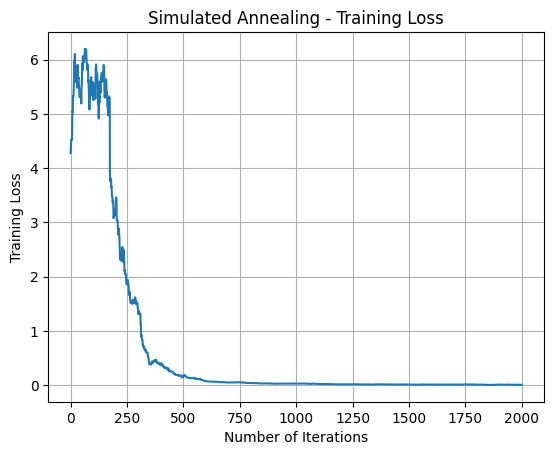

In [4]:
import numpy as np
import mlrose_hiive
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing, datasets
import pandas as pd
import time

nn_sa_best = mlrose_hiive.NeuralNetwork(hidden_nodes = [12], activation ='relu', algorithm ='simulated_annealing', max_iters = 2000, bias = True, is_classifier = True, learning_rate = 0.00001, early_stopping = True, max_attempts = 100, random_state = 24, curve = True)
for lr_index, learning_rate in enumerate(learning_rates):
	for index_opt, schedule in enumerate(schedules):
		nn_sa = mlrose_hiive.NeuralNetwork(hidden_nodes = [12], activation ='relu', algorithm ='simulated_annealing', max_iters = 2000, bias = True, schedule = schedule, is_classifier = True, learning_rate = learning_rate, early_stopping = True, max_attempts = 100, random_state = 24, curve = True)
		start = time.time()
		nn_sa.fit(X_train, y_train)
		end = time.time()
		time_sa_current = end - start
		y_train_pred_sa = nn_sa.predict(X_train)
		y_train_accuracy_sa = accuracy_score(y_train, y_train_pred_sa)
		train_acuracy_sa[lr_index][index_opt] = y_train_accuracy_sa
		y_validation_pred_sa = nn_sa.predict(X_val)
		y_validation_accuracy_sa = accuracy_score(y_val, y_validation_pred_sa)
		validation_acuracy_sa[lr_index][index_opt]= y_validation_accuracy_sa
		y_test_pred_sa = nn_sa.predict(X_test)
		y_test_accuracy_sa = accuracy_score(y_test, y_test_pred_sa)
		test_acuracy_sa[lr_index][index_opt] = y_test_accuracy_sa
		time_sa[lr_index][index_opt]= time_sa_current
		if y_validation_accuracy_sa > validation_acuracy_sa_best:
			nn_sa_best = nn_sa
			sa_best_lr_index = lr_index
			sa_best_index_opt = index_opt
			validation_acuracy_sa_best = y_validation_accuracy_sa

plt.figure()
plt.plot(nn_sa_best.fitness_curve[:,0])
plt.grid(True)
plt.xlabel('Number of Iterations')
plt.ylabel('Training Loss')
plt.title('Simulated Annealing - Training Loss')
plt.savefig('NN_Best_SA.png')

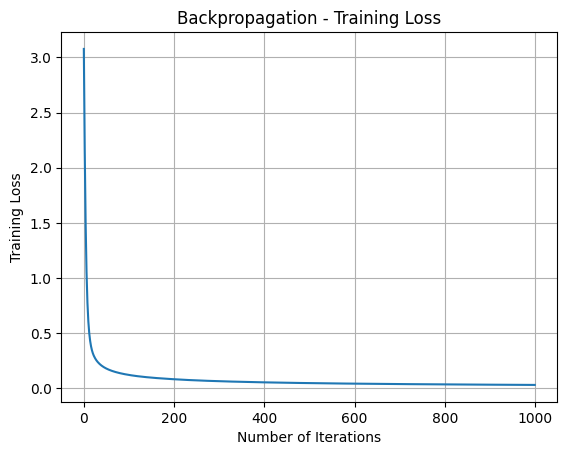

In [5]:
import numpy as np
import mlrose_hiive
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing, datasets
import pandas as pd
import time

nn_backprop_best = mlrose_hiive.NeuralNetwork(hidden_nodes = [12], activation ='relu',algorithm ='gradient_descent',max_iters = 1000, bias = True, is_classifier = True,learning_rate = 0.00001, early_stopping = True,max_attempts = 100, random_state = 42, curve = True)
for lr_index, learning_rate in enumerate(learning_rates):
	for index_opt in range(1):
		nn_backpropagation = mlrose_hiive.NeuralNetwork(hidden_nodes = [12], activation ='relu',algorithm ='gradient_descent',max_iters = 1000, bias = True, is_classifier = True,learning_rate = learning_rate, early_stopping = True,max_attempts = 100, random_state = 42, curve = True)
		start = time.time()
		nn_backpropagation.fit(X_train, y_train)
		end = time.time()
		time_backpropagation_current = end - start
		y_train_pred_backpropagation= nn_backpropagation.predict(X_train)
		y_train_accuracy_backpropagation= accuracy_score(y_train, y_train_pred_backpropagation)
		train_acuracy_backprop[lr_index][index_opt] = y_train_accuracy_backpropagation
		y_validation_pred_backpropagation= nn_backpropagation.predict(X_val)
		y_validation_accuracy_backpropagation= accuracy_score(y_val, y_validation_pred_backpropagation)
		validation_acuracy_backprop[lr_index][index_opt]= y_validation_accuracy_backpropagation
		y_test_pred_backpropagation= nn_backpropagation.predict(X_test)
		y_test_accuracy_backpropagation= accuracy_score(y_test, y_test_pred_backpropagation)
		test_acuracy_backprop[lr_index][index_opt] = y_test_accuracy_backpropagation
		time_backpropagation[lr_index][index_opt]= time_backpropagation_current
		if y_validation_accuracy_backpropagation> validation_acuracy_backprop_best:
			nn_backprop_best = nn_backpropagation
			backprop_best_lr_index = lr_index
			backprop_best_index_opt = index_opt
			validation_acuracy_backprop_best = y_validation_accuracy_backpropagation

plt.figure()
plt.plot(nn_backprop_best.fitness_curve)
plt.grid(True)
plt.xlabel('Number of Iterations')
plt.ylabel('Training Loss')
plt.title('Backpropagation - Training Loss')
plt.savefig('NN_Best_BP.png')

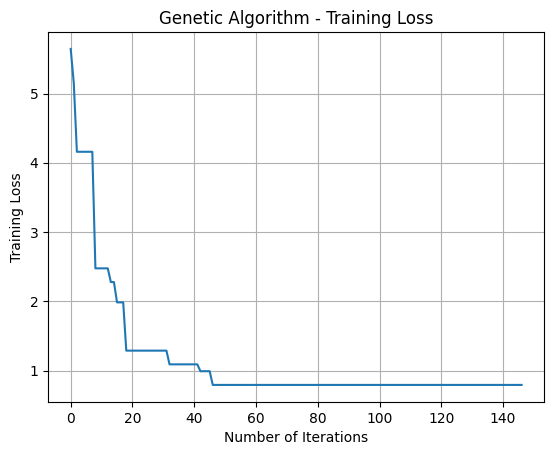

In [6]:
import numpy as np
import mlrose_hiive
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing, datasets
import pandas as pd
import time

nn_ga_best = mlrose_hiive.NeuralNetwork(hidden_nodes = [12], activation ='relu',algorithm ='genetic_alg',max_iters = 500, bias = True, is_classifier = True,learning_rate = 0.00001, early_stopping = True,max_attempts = 100, random_state = 42, curve = True)
for lr_index, learning_rate in enumerate(learning_rates):
	for index_opt, population in enumerate(populations):
		nn_ga = mlrose_hiive.NeuralNetwork(hidden_nodes = [12], activation ='relu',algorithm ='genetic_alg',max_iters = 500, bias = True, pop_size = population, is_classifier = True,learning_rate = learning_rate, early_stopping = True, max_attempts = 100, random_state = 42, curve = True)
		start = time.time()
		nn_ga.fit(X_train, y_train)
		end = time.time()
		time_ga_current = end - start
		y_train_pred_ga = nn_ga.predict(X_train)
		y_train_accuracy_ga = accuracy_score(y_train, y_train_pred_ga)
		train_acuracy_ga[lr_index][index_opt] = y_train_accuracy_ga
		y_validation_pred_ga = nn_ga.predict(X_val)
		y_validation_accuracy_ga = accuracy_score(y_val, y_validation_pred_ga)
		validation_acuracy_ga[lr_index][index_opt]= y_validation_accuracy_ga
		y_test_pred_ga = nn_ga.predict(X_test)
		y_test_accuracy_ga = accuracy_score(y_test, y_test_pred_ga)
		test_acuracy_ga[lr_index][index_opt] = y_test_accuracy_ga
		time_ga[lr_index][index_opt]= time_ga_current
		if y_validation_accuracy_ga > validation_acuracy_ga_best:
			nn_ga_best = nn_ga
			ga_best_lr_index = lr_index
			ga_best_index_opt = index_opt
			validation_acuracy_ga_best = y_validation_accuracy_ga

plt.figure()
plt.plot(nn_ga_best.fitness_curve[:,0])
plt.grid(True)
plt.xlabel('Number of Iterations')
plt.ylabel('Training Loss')
plt.title('Genetic Algorithm - Training Loss')
plt.savefig('NN_Best_GA.png')

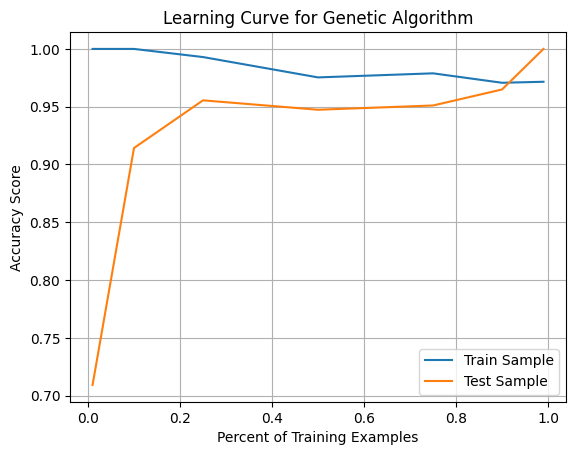

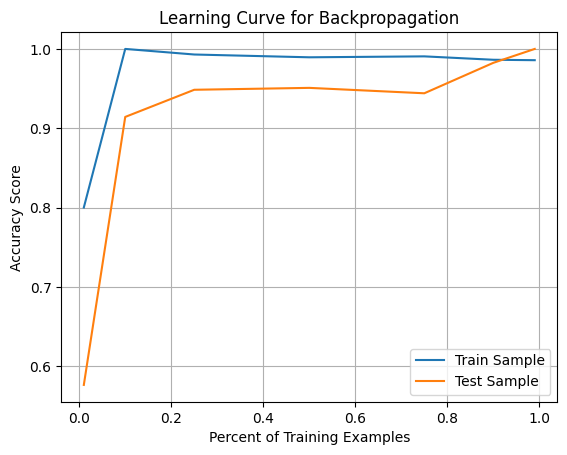

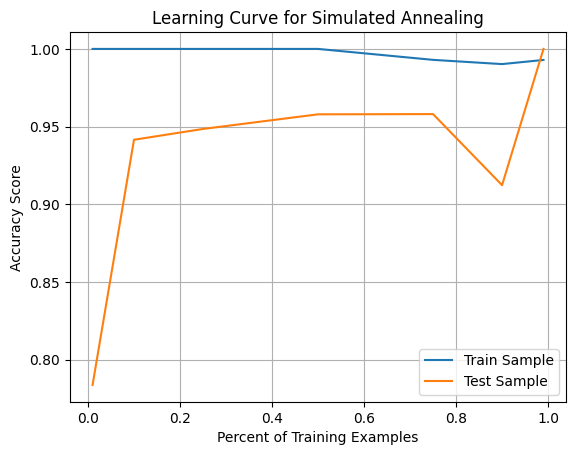

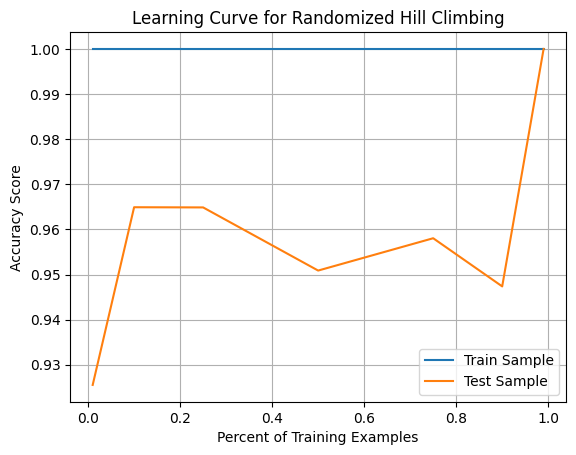

In [7]:
import numpy as np
import mlrose_hiive
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing, datasets
import pandas as pd
import time

test_sizes = [0.99, 0.9, 0.75, 0.5, 0.25, 0.1, 0.01]
train_acuracy_ga_lrc = []
test_acuracy_ga_lrc = []
train_acuracy_backprop_lrc = []
test_acuracy_backprop_lrc = []
train_acuracy_sa_lrc = []
test_acuracy_sa_lrc = []
train_acuracy_rhc_lrc = []
test_acuracy_rhc_lrc = []

for test_size in test_sizes:
	X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 24)
	nn_ga = mlrose_hiive.NeuralNetwork(hidden_nodes = [12], activation ='relu',algorithm ='genetic_alg',max_iters = 500, bias = True, pop_size = populations[ga_best_index_opt], is_classifier = True,learning_rate = learning_rates[ga_best_lr_index], early_stopping = True,max_attempts = 100, random_state = 24, curve = True)
	nn_backpropagation = mlrose_hiive.NeuralNetwork(hidden_nodes = [12], activation ='relu',algorithm ='gradient_descent',max_iters = 1000, bias = True, is_classifier = True,learning_rate = learning_rates[backprop_best_lr_index], early_stopping = True,max_attempts = 100, random_state = 24, curve = True)
	nn_sa = mlrose_hiive.NeuralNetwork(hidden_nodes = [12], activation ='relu',algorithm ='simulated_annealing',max_iters = 2000, bias = True, schedule = schedules[sa_best_index_opt], is_classifier = True,learning_rate = learning_rates[sa_best_lr_index], early_stopping = True,max_attempts = 100, random_state = 24, curve = True)
	nn_rhc = mlrose_hiive.NeuralNetwork(hidden_nodes = [12], activation ='relu',algorithm ='random_hill_climb',max_iters = 2000, bias = True, restarts = restarts[rhc_best_index_opt], is_classifier = True,learning_rate = learning_rates[rhc_best_lr_index], early_stopping = True,max_attempts = 100, random_state = 24, curve = True)
	nn_ga.fit(X_train, y_train)
	y_train_pred_ga = nn_ga.predict(X_train)
	y_train_accuracy_ga = accuracy_score(y_train, y_train_pred_ga)
	train_acuracy_ga_lrc.append(y_train_accuracy_ga)
	y_test_pred_ga = nn_ga.predict(X_test)
	y_test_accuracy_ga = accuracy_score(y_test, y_test_pred_ga)
	test_acuracy_ga_lrc.append(y_test_accuracy_ga)
	nn_backpropagation.fit(X_train, y_train)
	y_train_pred_backpropagation= nn_backpropagation.predict(X_train)
	y_train_accuracy_backpropagation= accuracy_score(y_train, y_train_pred_backpropagation)
	train_acuracy_backprop_lrc.append(y_train_accuracy_backpropagation)
	y_test_pred_backpropagation= nn_backpropagation.predict(X_test)
	y_test_accuracy_backpropagation= accuracy_score(y_test, y_test_pred_backpropagation)
	test_acuracy_backprop_lrc.append(y_test_accuracy_backpropagation)
	nn_rhc.fit(X_train, y_train)
	y_train_pred_rhc = nn_rhc.predict(X_train)
	y_train_accuracy_rhc = accuracy_score(y_train, y_train_pred_rhc)
	train_acuracy_rhc_lrc.append(y_train_accuracy_rhc)
	y_test_pred_rhc = nn_rhc.predict(X_test)
	y_test_accuracy_rhc = accuracy_score(y_test, y_test_pred_rhc)
	test_acuracy_rhc_lrc.append(y_test_accuracy_rhc)
	nn_sa.fit(X_train, y_train)
	y_train_pred_sa = nn_sa.predict(X_train)
	y_train_accuracy_sa = accuracy_score(y_train, y_train_pred_sa)
	train_acuracy_sa_lrc.append(y_train_accuracy_sa)
	y_test_pred_sa = nn_sa.predict(X_test)
	y_test_accuracy_sa = accuracy_score(y_test, y_test_pred_sa)
	test_acuracy_sa_lrc.append(y_test_accuracy_sa)

train_sizes = [1 - test_size for test_size in test_sizes]
plt.figure()
plt.plot(train_sizes, train_acuracy_ga_lrc, label = 'Train Sample')
plt.plot(train_sizes, test_acuracy_ga_lrc, label = 'Test Sample')
plt.grid()
plt.legend()
plt.xlabel('Percent of Training Examples')
plt.ylabel('Accuracy Score')
plt.title('Learning Curve for Genetic Algorithm')
plt.savefig('NN_LC_GA.png')

plt.figure()
plt.plot(train_sizes, train_acuracy_backprop_lrc, label = 'Train Sample')
plt.plot(train_sizes, test_acuracy_backprop_lrc, label = 'Test Sample')
plt.grid()
plt.legend()
plt.xlabel('Percent of Training Examples')
plt.ylabel('Accuracy Score')
plt.title('Learning Curve for Backpropagation')
plt.savefig('NN_LC_BP.png')

plt.figure()
plt.plot(train_sizes, train_acuracy_sa_lrc, label = 'Train Sample')
plt.plot(train_sizes, test_acuracy_sa_lrc, label = 'Test Sample')
plt.grid()
plt.legend()
plt.xlabel('Percent of Training Examples')
plt.ylabel('Accuracy Score')
plt.title('Learning Curve for Simulated Annealing')
plt.savefig('NN_LC_SA.png')

plt.figure()
plt.plot(train_sizes, train_acuracy_rhc_lrc, label = 'Train Sample')
plt.plot(train_sizes, test_acuracy_rhc_lrc, label = 'Test Sample')
plt.grid()
plt.legend()
plt.xlabel('Percent of Training Examples')
plt.ylabel('Accuracy Score')
plt.title('Learning Curve for Randomized Hill Climbing')
plt.savefig('NN_LC_RHC.png')

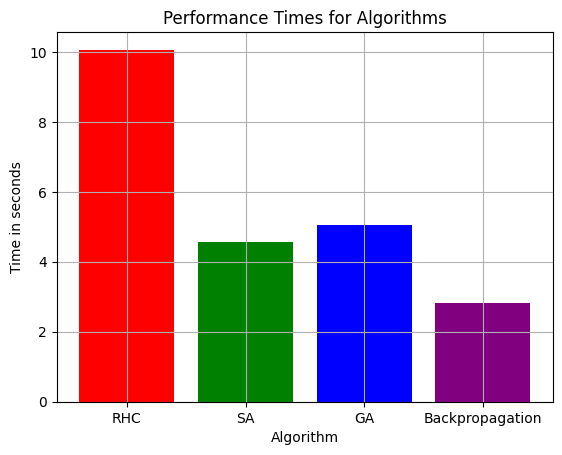

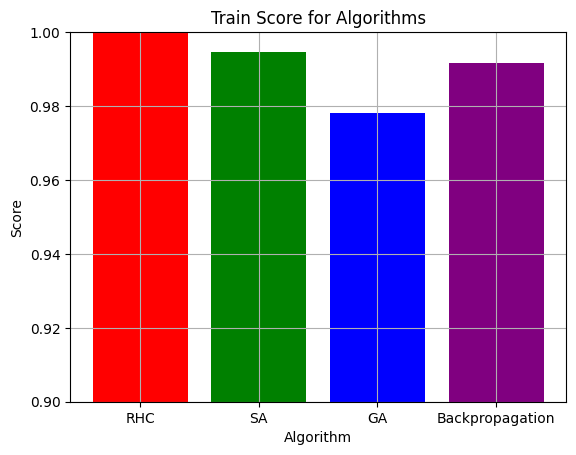

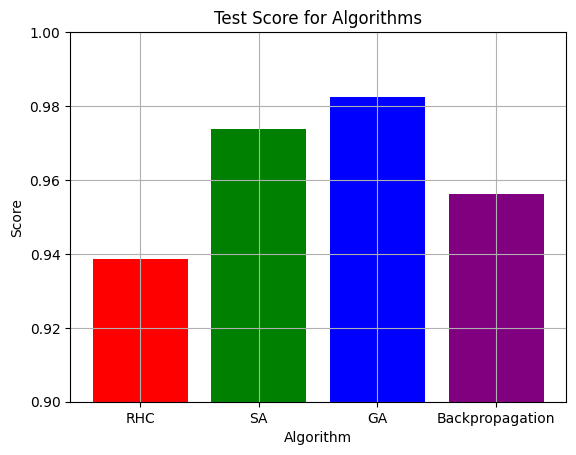

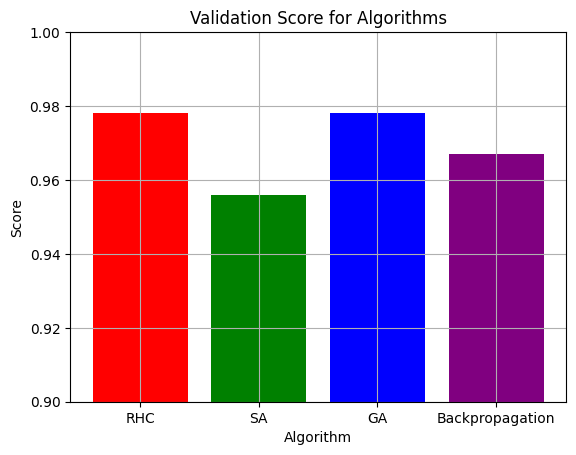

In [8]:
import numpy as np
import mlrose_hiive
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing, datasets
import pandas as pd
import time

plt.figure()
plt.bar(['RHC', 'SA', 'GA', 'Backpropagation'], [time_rhc[rhc_best_lr_index][rhc_best_index_opt], time_sa[sa_best_lr_index][sa_best_index_opt], time_ga[ga_best_lr_index][ga_best_index_opt], time_backpropagation[backprop_best_lr_index][backprop_best_index_opt]],color=['red', 'green', 'blue', 'purple'])
plt.xlabel("Algorithm")
plt.ylabel("Time in seconds")
plt.title('Performance Times for Algorithms')
plt.grid(True)
plt.savefig('NN_Best_Time.png')

plt.figure()
plt.bar(['RHC', 'SA', 'GA', 'Backpropagation'], [train_acuracy_rhc[rhc_best_lr_index][rhc_best_index_opt], train_acuracy_sa[sa_best_lr_index][sa_best_index_opt], train_acuracy_ga[ga_best_lr_index][ga_best_index_opt], train_acuracy_backprop[backprop_best_lr_index][backprop_best_index_opt]],color=['red', 'green', 'blue', 'purple'] )
plt.xlabel("Algorithm")
plt.ylabel("Score")
plt.title('Train Score for Algorithms')
plt.ylim((0.9,1.0))
plt.grid(True)
plt.savefig('NN_Best_Train.png')

plt.figure()
plt.bar(['RHC', 'SA', 'GA', 'Backpropagation'], [test_acuracy_rhc[rhc_best_lr_index][rhc_best_index_opt], test_acuracy_sa[sa_best_lr_index][sa_best_index_opt], test_acuracy_ga[ga_best_lr_index][ga_best_index_opt], test_acuracy_backprop[backprop_best_lr_index][backprop_best_index_opt]],color=['red', 'green', 'blue', 'purple'])
plt.xlabel("Algorithm")
plt.ylabel("Score")
plt.title('Test Score for Algorithms')
plt.ylim((0.9,1.0))
plt.grid(True)
plt.savefig('NN_Best_Test.png')

plt.figure()
plt.bar(['RHC', 'SA', 'GA', 'Backpropagation'], [validation_acuracy_rhc[rhc_best_lr_index][rhc_best_index_opt], validation_acuracy_sa[sa_best_lr_index][sa_best_index_opt], validation_acuracy_ga[ga_best_lr_index][ga_best_index_opt], validation_acuracy_backprop[backprop_best_lr_index][backprop_best_index_opt]],color=['red', 'green', 'blue', 'purple'])
plt.xlabel("Algorithm")
plt.ylabel("Score")
plt.title('Validation Score for Algorithms')
plt.ylim((0.9,1.0))
plt.grid(True)
plt.savefig('NN_Best_Val.png')